In [14]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, decomposition
%matplotlib inline
from PIL import Image, ImageOps
from ssim import SSIM
from ssim.utils import get_gaussian_kernel
from sklearn import datasets, svm, metrics, decomposition
digits = datasets.load_digits()
import math
from math import *
import sklearn
from sklearn.tree import DecisionTreeClassifier
import pywt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv("Digits Dataset/train.csv")

In [11]:
y = np.array(data['label'])

In [12]:
X = np.array(data.drop('label', axis=1))

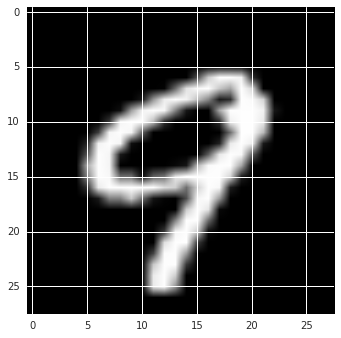

In [15]:
plt.imshow(np.reshape(X[100], (28,28)), cmap="Greys_r")

In [16]:
y.shape

(42000L,)

In [17]:
X.shape

(42000L, 784L)

In [18]:
y.shape

(42000L,)

In [45]:
#a = Image.fromarray(X[100].reshape(28,28)/np.max(X[100]) )
import matplotlib.cm as cm

myarray = X[100].reshape(28,28)/np.max(X[100])
im = ImageOps.grayscale(Image.fromarray(np.uint8(cm.Greys_r(myarray)*255)))

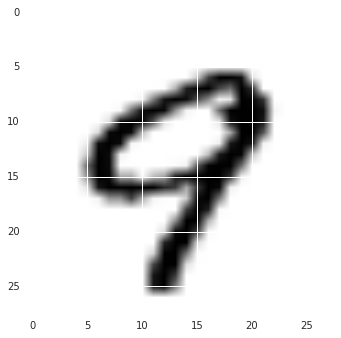

In [46]:
plt.imshow(im)

In [47]:
master_image_arr = []
for indx in range(len(X)):
    myarray = X[indx].reshape(28,28)/np.max(X[indx])
    im = ImageOps.grayscale(Image.fromarray(np.uint8(cm.Greys_r(myarray)*255)))
    master_image_arr.append(im)

In [50]:
len(master_image_arr)

42000

In [51]:
n = len(X)
X_train, X_test, y_train, y_test = master_image_arr[0:21000], master_image_arr[21000::], y[0:21000], y[21000::]

In [53]:
from scipy import stats
import scipy
scipy.stats.itemfreq(y_test)

array([[   0, 2088],
       [   1, 2312],
       [   2, 2069],
       [   3, 2174],
       [   4, 1997],
       [   5, 1897],
       [   6, 2062],
       [   7, 2234],
       [   8, 2058],
       [   9, 2109]], dtype=int64)

In [55]:
predicted_class = []
for im_1 in X_test:
    ssim_master = np.array([])
    
    for im_2 in X_train:
        ssim_master = np.append(SSIM(im_1).cw_ssim_value(im_2), ssim_master)
    
    predicted_class.append(y_train[np.argmax(ssim_master)])

KeyboardInterrupt: 

In [ ]:
np.count_nonzero(y_test==np.array(predicted_class))/len(y_test)

In [20]:
SSIM(   Image.fromarray(np.reshape(X[100], (28,28)))  ).cw_ssim_value(   Image.fromarray(np.reshape(X[100], (28,28)))  )

TypeError: Cannot handle this data type

In [48]:
clf = DecisionTreeClassifier(max_depth=5)
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=.4, random_state=42)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print score

0.67619047619


In [49]:
clf = svm.SVC(gamma=0.001)
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=.4, random_state=42)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print score #lol

0.110178571429
